In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Data directories
train_data_dir = 'C:/Dataset_Compare/cropweed1/train'
test_data_dir = 'C:/Dataset_Compare/cropweed1/test'

# Hyperparameters
batch_size = 32
epochs = 10
learning_rate = 0.0001

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data preprocessing for test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to prevent retraining
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_1.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

94765736/94765736 [==============================] - 61s 1us/step


In [4]:
# Prepare the training and testing data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history_1 = model_1.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)

Found 265 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 355s 44s/step - loss: 0.9748 - accuracy: 0.5236 - val_loss: 0.6345 - val_accuracy: 0.6562
Epoch 2/10
8/8 [==============================] - 313s 40s/step - loss: 0.6817 - accuracy: 0.6609 - val_loss: 1.1106 - val_accuracy: 0.4844
Epoch 3/10
8/8 [==============================] - 331s 43s/step - loss: 0.6242 - accuracy: 0.6481 - val_loss: 0.8712 - val_accuracy: 0.5156
Epoch 4/10
8/8 [==============================] - 331s 42s/step - loss: 0.5387 - accuracy: 0.6824 - val_loss: 0.6762 - val_accuracy: 0.7344
Epoch 5/10
8/8 [==============================] - 305s 39s/step - loss: 0.5491 - accuracy: 0.6953 - val_loss: 0.5243 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 307s 39s/step - loss: 0.5187 - accuracy: 0.7039 - val_loss: 0.6741 - val_accuracy: 0.7344
Epoch 7/10
8/8 [==============================] - 277s 38s/step - loss: 0.5472 

In [5]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [6]:
#Plotting our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="Validation_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

  #Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()


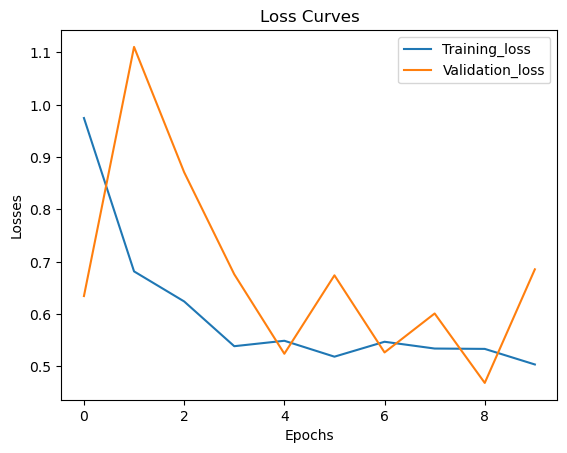

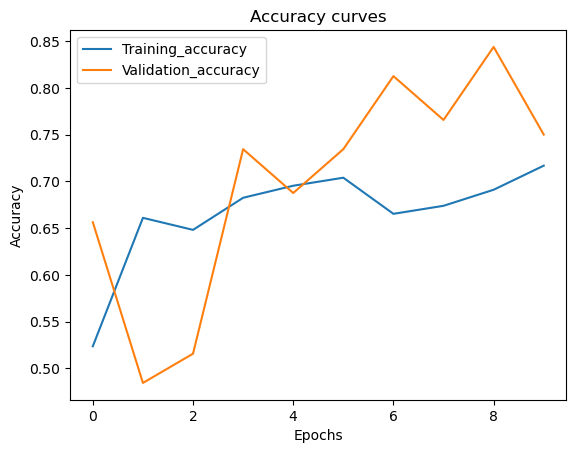

In [7]:
plot_loss_curves(history_1)

In [8]:
# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Data directories
train_data_dir = 'C:/Dataset_Compare/cropweed2/train'
test_data_dir = 'C:/Dataset_Compare/cropweed2/test'

# Hyperparameters
batch_size = 32
epochs = 10
learning_rate = 0.0001

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data preprocessing for test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Create the final model
model_2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to prevent retraining
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_2.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Prepare the training and testing data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)

Found 320 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 105s 10s/step - loss: 1.0538 - accuracy: 0.5375 - val_loss: 0.6034 - val_accuracy: 0.6562
Epoch 2/10
10/10 [==============================] - 106s 11s/step - loss: 0.7169 - accuracy: 0.5969 - val_loss: 0.5418 - val_accuracy: 0.7500
Epoch 3/10
10/10 [==============================] - 106s 11s/step - loss: 0.6217 - accuracy: 0.6406 - val_loss: 0.4487 - val_accuracy: 0.8594
Epoch 4/10
10/10 [==============================] - 105s 11s/step - loss: 0.4985 - accuracy: 0.8344 - val_loss: 0.4181 - val_accuracy: 0.8906
Epoch 5/10
10/10 [==============================] - 102s 10s/step - loss: 0.4463 - accuracy: 0.8375 - val_loss: 0.3679 - val_accuracy: 0.8906
Epoch 6/10
10/10 [==============================] - 102s 10s/step - loss: 0.4016 - accuracy: 0.8906 - val_loss: 0.2914 - val_accuracy: 0.9219
Epoch 7/10
10/10 [==============================] - 98s 10s/step - 

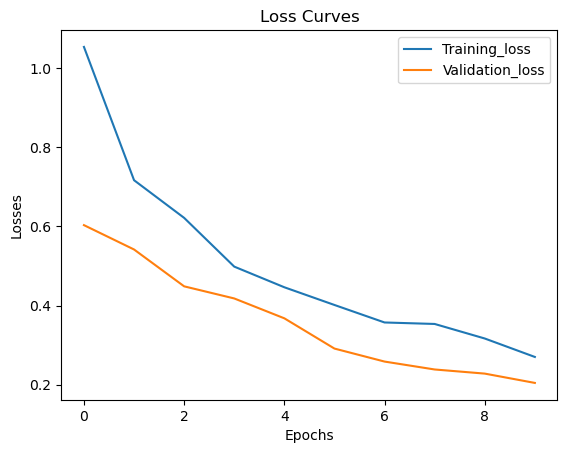

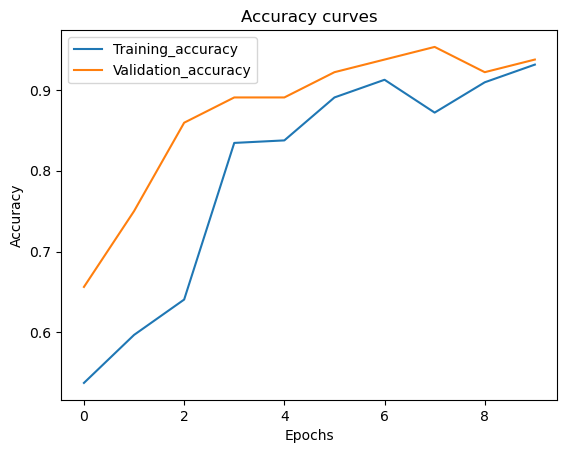

In [11]:
plot_loss_curves(history_2)